In [1]:
from io import open
import glob
import os

def findFiles(path): return glob.glob(path)

print(findFiles('data/names/*.txt'))

import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

# Build the category_lines dictionary, a list of names per language
category_lines = {}
all_categories = []

# Read a file and split into lines
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in findFiles('./data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)
print(f"n_categories={n_categories}")
print(f"all_categories={all_categories}")
print(f"category_lines={category_lines}")
print(f"all_letters={all_letters}") #26*2+5=52+5=57

['data/names\\Arabic.txt', 'data/names\\Chinese.txt', 'data/names\\Czech.txt', 'data/names\\Dutch.txt', 'data/names\\English.txt', 'data/names\\French.txt', 'data/names\\German.txt', 'data/names\\Greek.txt', 'data/names\\Irish.txt', 'data/names\\Italian.txt', 'data/names\\Japanese.txt', 'data/names\\Korean.txt', 'data/names\\Polish.txt', 'data/names\\Portuguese.txt', 'data/names\\Russian.txt', 'data/names\\Scottish.txt', 'data/names\\Spanish.txt', 'data/names\\Vietnamese.txt']
Slusarski
n_categories=18
all_categories=['Arabic', 'Chinese', 'Czech', 'Dutch', 'English', 'French', 'German', 'Greek', 'Irish', 'Italian', 'Japanese', 'Korean', 'Polish', 'Portuguese', 'Russian', 'Scottish', 'Spanish', 'Vietnamese']
category_lines={'Arabic': ['Khoury', 'Nahas', 'Daher', 'Gerges', 'Nazari', 'Maalouf', 'Gerges', 'Naifeh', 'Guirguis', 'Baba', 'Sabbagh', 'Attia', 'Tahan', 'Haddad', 'Aswad', 'Najjar', 'Dagher', 'Maloof', 'Isa', 'Asghar', 'Nader', 'Gaber', 'Abboud', 'Maalouf', 'Zogby', 'Srour', 'Baha

In [10]:
import torch

# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(1,len(line), n_letters)
    for li, letter in enumerate(line):
        tensor[0][li][letterToIndex(letter)] = 1
    return tensor

print("J:",letterToTensor('J'))
print("j:",letterToTensor('j'))

print(lineToTensor('Jones').size())#5*1*57
print("Jones:",lineToTensor('Jones'))

J: tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
j: tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([1, 5, 57])
Jones: tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       

In [11]:
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]
def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor
print(randomTrainingExample())

('Spanish', 'Castell', tensor([16]), tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,


In [12]:
total=0
for ntype in all_categories:
    NameList=category_lines[ntype]
    total+=len(NameList)
print(f"total data={total}")

total data=20074


In [15]:
import torch
import torch.nn as nn

class CustomRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(CustomRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input_seq):
        # initialize 
        batch_size = input_seq.size(0)
        #print(f"batch_size={batch_size}")
        hidden = torch.zeros(1, batch_size, self.hidden_size)

        # forward
        output, hidden = self.rnn(input_seq, hidden)

        # 获取最后一个时间步的输出
        output = output[:, -1, :]
        
        # 线性层和softmax激活函数
        output = self.linear(output)
        output = self.softmax(output)
        return output

# model parameter
input_size = n_letters  # each character len, feature len
hidden_size = 128  # the same as the tutorial
output_size = n_categories  # 

# 创建模型实例
rnn_model = CustomRNN(input_size, hidden_size, output_size)




In [16]:
#train the model
# training data: input_data 
# #labels: target_labels
# 设置优化器和损失函数
learning_rate = 0.001
criterion = nn.NLLLoss()  # 使用负对数似然损失作为损失函数
optimizer = torch.optim.Adam(rnn_model.parameters(), lr=learning_rate)

# 迭代训练模型
epochs = 5
trainingN=int(total*0.8)
testN=int(total*0.2)
train_loss=[]
for epoch in range(epochs):
    running_loss = 0.0
    for i in range(trainingN):
        category, line, category_tensor, line_tensor=randomTrainingExample()
        optimizer.zero_grad()  # 梯度归零
        output = rnn_model(line_tensor)  # 前向传播
        loss = criterion(output, category_tensor)  # 计算损失
        loss.backward()  # 反向传播
        optimizer.step()  # 更新权重
    running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/total}")
    train_loss.append(running_loss/total)
print('Training finished!')
# Save the trained model
torch.save(rnn_model.state_dict(), 'rnn_model2.pth')

Epoch 1/5, Loss: 4.8952379632402345e-05
Epoch 2/5, Loss: 5.1369850671397055e-05
Epoch 3/5, Loss: 9.618645176310766e-07
Epoch 4/5, Loss: 4.145892163820448e-06
Epoch 5/5, Loss: 6.150730515430206e-07
Training finished!


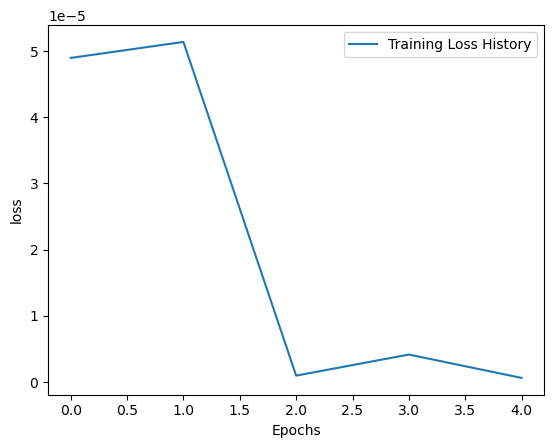

In [17]:
import matplotlib.pyplot as plt
def plotLossHistory(train_losses):
    plt.figure()
    plt.plot(range(len(train_losses)), train_losses, label='Training Loss History')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.legend()
plotLossHistory(train_loss)

In [19]:
# Load the trained autoencoder model
rnn_model.load_state_dict(torch.load('rnn_model2.pth'))
rnn_model.eval()
# Reconstruct and display the chosen examples
accuracy=0.0
correct=0
predictions=[]
trueLabel=[]
with torch.no_grad():
    for i in range(testN):
        category, line, category_tensor, line_tensor=randomTrainingExample()
        print(f"category_tensor.item()={category_tensor.item()}")
        output = rnn_model(line_tensor)  # 前向传播
        trueLabel.append(category_tensor.item())
        _, predicted = torch.max(output, 1)  # 获取预测结果的索引
        predictions.append(predicted.item())  # 将预测结果加入到预测列表中
        print("predicted.item()=",predicted.item())
        if predicted==category_tensor.item():
            correct+=1
    print(f"accuracy={correct/testN}")
            

category_tensor.item()=8
predicted.item()= 4
category_tensor.item()=3
predicted.item()= 2
category_tensor.item()=15
predicted.item()= 15
category_tensor.item()=16
predicted.item()= 14
category_tensor.item()=13
predicted.item()= 12
category_tensor.item()=11
predicted.item()= 11
category_tensor.item()=16
predicted.item()= 16
category_tensor.item()=5
predicted.item()= 5
category_tensor.item()=2
predicted.item()= 2
category_tensor.item()=2
predicted.item()= 2
category_tensor.item()=4
predicted.item()= 4
category_tensor.item()=15
predicted.item()= 15
category_tensor.item()=17
predicted.item()= 17
category_tensor.item()=15
predicted.item()= 14
category_tensor.item()=4
predicted.item()= 14
category_tensor.item()=8
predicted.item()= 4
category_tensor.item()=1
predicted.item()= 1
category_tensor.item()=3
predicted.item()= 6
category_tensor.item()=11
predicted.item()= 11
category_tensor.item()=11
predicted.item()= 11
category_tensor.item()=1
predicted.item()= 1
category_tensor.item()=2
predicted

Confusion Matrix:
[[169   1   1   1   7   7   0   3   6   4   4   0   2   0   7   0   0   0]
 [  0 157   0   0   0   0   0   0   0   0   2  45   2   0   2   1   0  14]
 [  2   0 112  16  11   6  16   1   0   3   2   0  16   3  25   9   6   3]
 [  2   1   7 172  12  17  16   4   0   0   0   0   0   0   6   0   2   1]
 [  3   0  16  16  74  19  19   8   6   1   2   1   1   0  11  27  10   1]
 [  0   2  12   9  24 128  12   2   2   0   0   0   4   1   6   8   3   0]
 [  6   0  15  20  25  19 110   3   0   1   3   4   5   0  11   5   6   0]
 [  2   0   0   2   0   3   0 220   0   6   0   0   0   1   1   0   1   0]
 [  3   0   5   0  27   2   6   0 140   0   0   0   2   0  11  13   4   1]
 [  1   2   5   1   0   6   0   0   1 161   7   0   2   2   1   1  37   0]
 [  3   1   5   0   1   1   0   6   0  14 148   0   4   3   5   0   4   1]
 [  0   4   0   0   0   0   0   0   0   0   0 233   0   0   0   0   0  12]
 [  0   0  10   0   5   7   1   0   0   0   0   0 189   0   0   1   2   0]
 [  0  

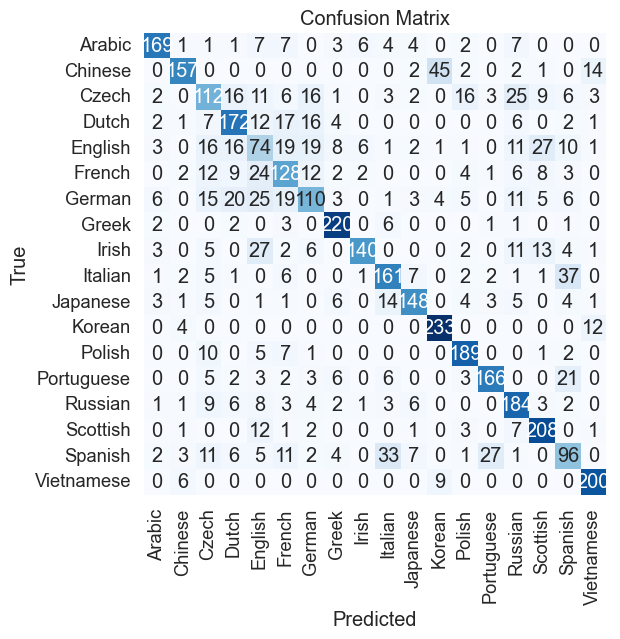

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_confusion_matrix2(true_labels, predicted_labels, class_names=['Class 0', 'Class 1', 'Class 2']):
    # 计算混淆矩阵
    cm = confusion_matrix(true_labels, predicted_labels)
    
    # 创建热图
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)  # 设置字体大小
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
                xticklabels=class_names, yticklabels=class_names)
    
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    
    #plt.show()
confusion = confusion_matrix(trueLabel, predictions)
print("Confusion Matrix:")
print(confusion)
plot_confusion_matrix2(trueLabel,predictions,class_names=all_categories)